In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour les graphiques
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')


# Bibliothèque pour la lecture des fichiers Excel
!pip install openpyxl
import openpyxl

# Optionnel : affichage de toutes les colonnes du DataFrame
pd.set_option('display.max_columns', None)

# Optionnel : ajustement de la largeur des colonnes pour un meilleur affichage
pd.set_option('display.max_colwidth', None)

# Optionnel : pour augmenter la limite de lignes affichées dans les outputs du notebook
pd.set_option('display.max_rows', 500)


In [2]:
# Chemin vers le fichier
file_path = '/home/jovyan/work/Donnees_Delinquance_2016.xlsx'

df = pd.read_excel(file_path, sheet_name='2016', header=3)
df.drop(columns=['Unnamed: 0'], inplace=True)

# Affichage des premières lignes pour vérifier
df.head()


Département      Libellé Département  Population  Nombre de logements  \
0          01                      AIN      626127               293836   
1          02                    AISNE      539783               260198   
2          03                   ALLIER      343062               204002   
3          04  ALPES DE HAUTE PROVENCE      161588               123410   
4          05             HAUTES ALPES      139883               131268   

   Vols avec armes (armes à feu, armes blanches ou par destination)         %  \
0                                                                31  0.004951   
1                                                                40  0.007410   
2                                                                18  0.005247   
3                                                                11  0.006807   
4                                                                 9  0.006434   

   Vols violents sans arme       %.1  Vols sans violence contre des personnes  \
0                      140  0.022360                                     3235   
1                      187  0.034644                                     2867   
2                       95  0.027692                                     1899   
3                       86  0.053222                                     1353   
4                       60  0.042893                                     1411   

        %.2  Coups et blessures volontaires (sur personnes de 15 ans ou plus)  \
0  0.516668                                                              1436   
1  0.531139                                                              1908   
2  0.553544                                                               866   
3  0.837315                                                               483   
4  1.008700                                                               431   

        %.3  Cambriolages de logement       %.4  \
0  0.229346                      2350  0.375323   
1  0.353475                      1573  0.291413   
2  0.252433                      1063  0.309857   
3  0.298908                       607  0.375647   
4  0.308115                       348  0.248779   

   Vols de véhicules (automobiles ou deux roues motorisés)       %.5  \
0                                                     1308  0.208903   
1                                                     1102  0.204156   
2                                                      542  0.157989   
3                                                      357  0.220932   
4                                                      240  0.171572   

   Vols dans les véhicules       %.6  Vols d'accessoires sur véhicules  \
0                     1459  0.233020                               970   
1                     1139  0.211011                               763   
2                      467  0.136127                               353   
3                      772  0.477758                               230   
4                      379  0.270941                               124   

        %.7  
0  0.154921  
1  0.141353  
2  0.102897  
3  0.142337  
4  0.088646

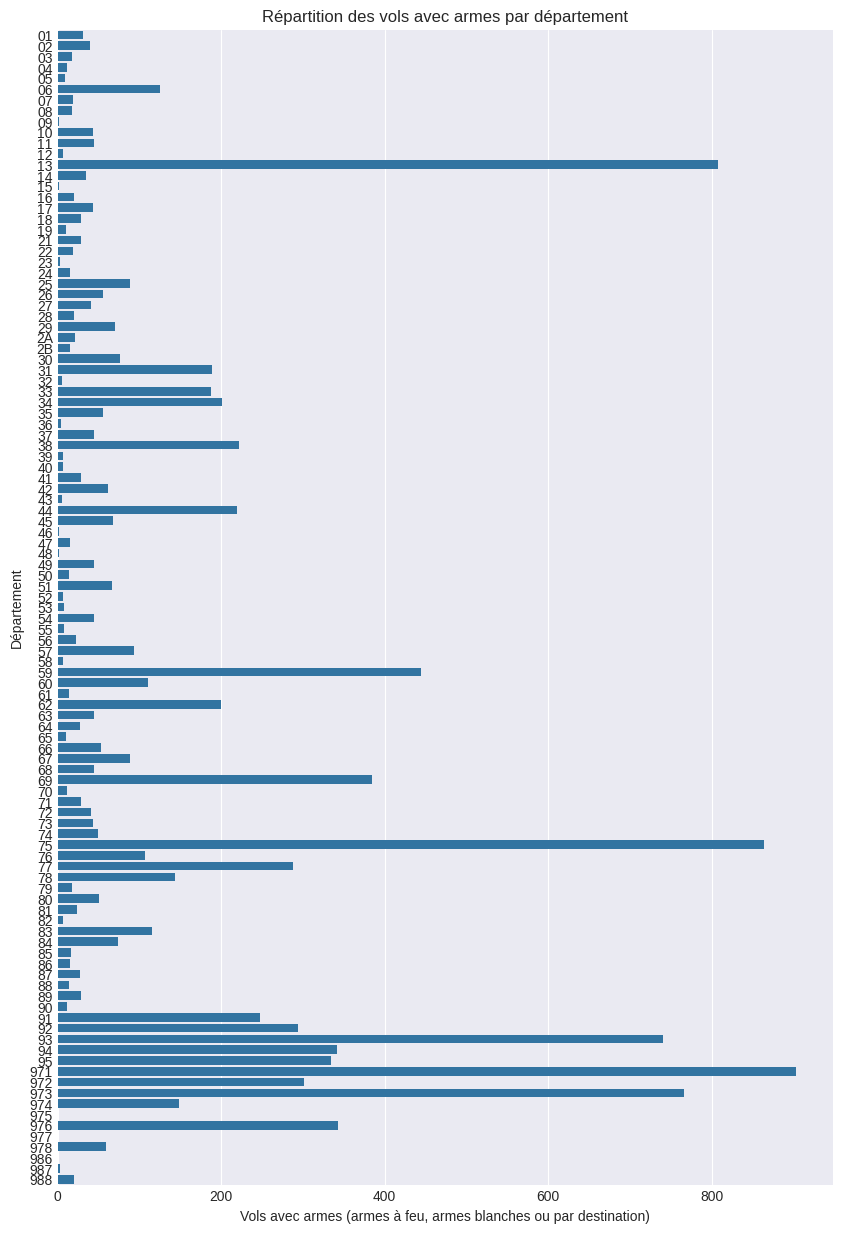

In [3]:
plt.figure(figsize=(10, 15)) 
sns.barplot(y='Département', x='Vols avec armes (armes à feu, armes blanches ou par destination)', data=df)
plt.title('Répartition des vols avec armes par département')
plt.show()


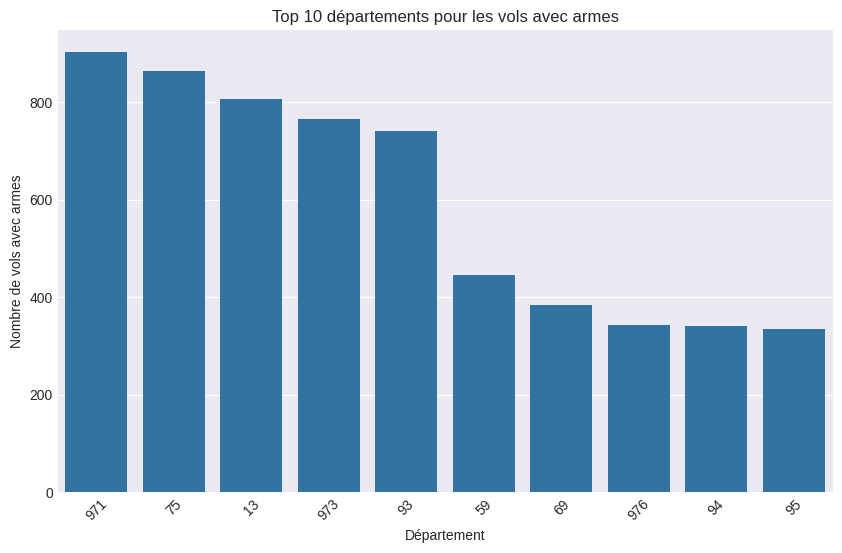

In [5]:
# Tri des départements par 'Vols avec armes' et sélection des 10 premiers
top_vols_avec_armes = df.nlargest(10, 'Vols avec armes (armes à feu, armes blanches ou par destination)')


plt.figure(figsize=(10, 6))  
sns.barplot(x='Département', y='Vols avec armes (armes à feu, armes blanches ou par destination)', data=top_vols_avec_armes)
plt.title('Top 10 départements pour les vols avec armes')
plt.xlabel('Département')
plt.ylabel('Nombre de vols avec armes')
plt.xticks(rotation=45) 
plt.show()



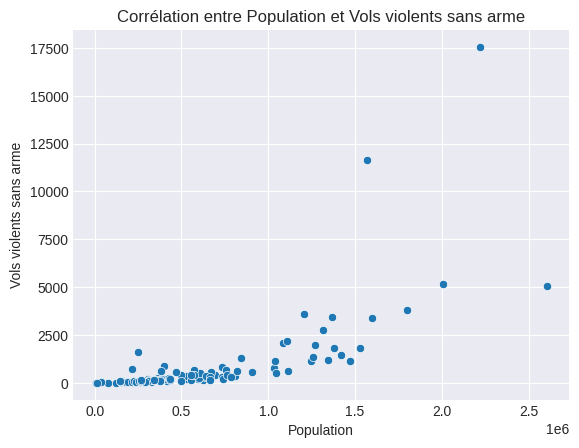

In [7]:
sns.scatterplot(x='Population', y='Vols violents sans arme', data=df)
plt.title('Corrélation entre Population et Vols violents sans arme')
plt.show()


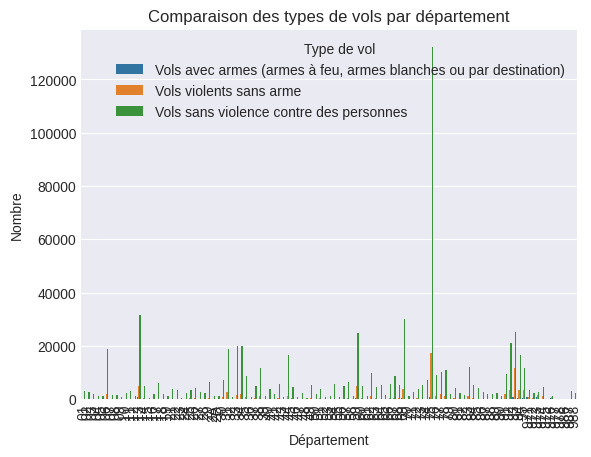

In [8]:
df_melted = df.melt(id_vars=['Département', 'Libellé Département'], 
                    value_vars=['Vols avec armes (armes à feu, armes blanches ou par destination)', 
                                'Vols violents sans arme', 
                                'Vols sans violence contre des personnes'],
                    var_name='Type de vol', value_name='Nombre')
sns.barplot(x='Département', y='Nombre', hue='Type de vol', data=df_melted)
plt.xticks(rotation=90)
plt.title('Comparaison des types de vols par département')
plt.show()


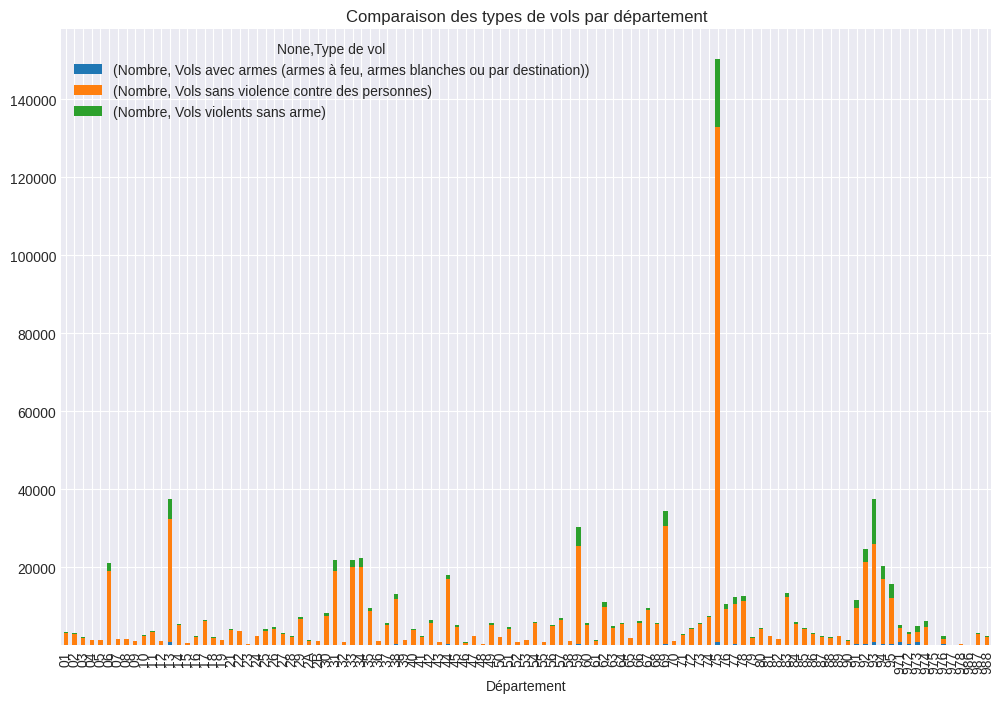

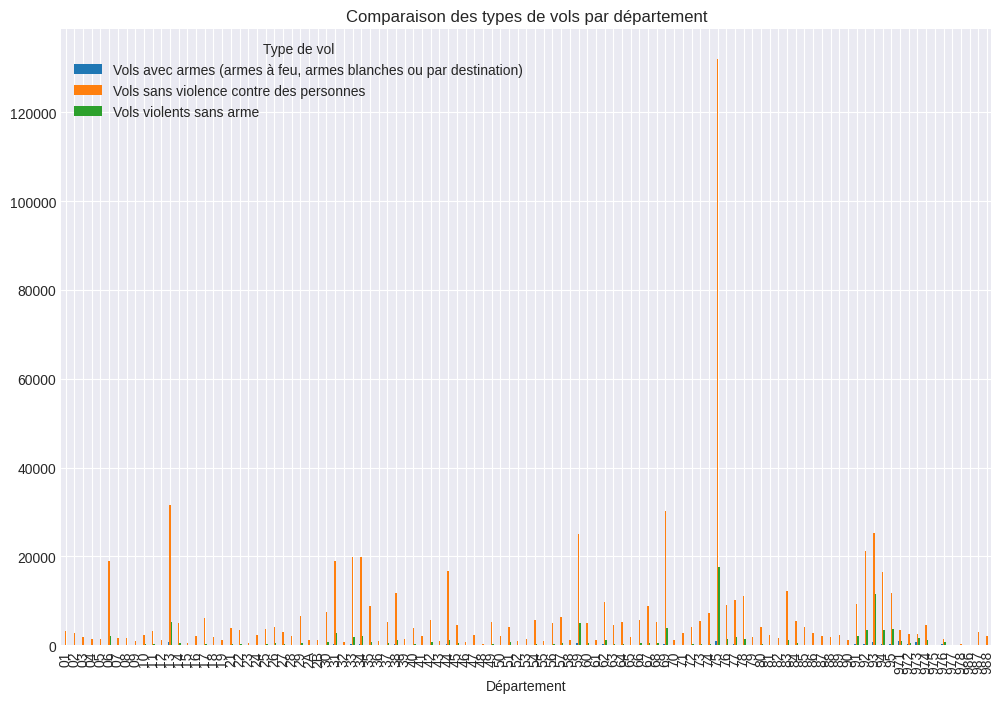

In [9]:
df_grouped = df_melted.groupby(['Département', 'Type de vol']).sum().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Comparaison des types de vols par département')
plt.xticks(rotation=90)
plt.show()


df_pivot = df_melted.pivot(index='Département', columns='Type de vol', values='Nombre')
df_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Comparaison des types de vols par département')
plt.xticks(rotation=90)
plt.show()


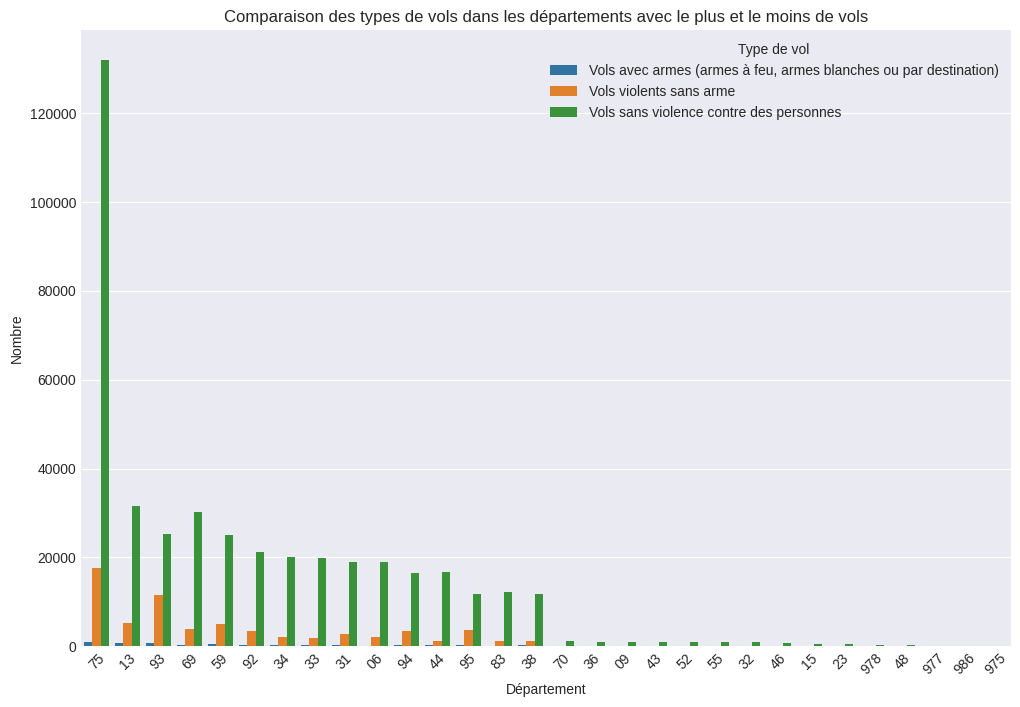

In [10]:
# Calculer le total des vols pour chaque département
df['Total Vols'] = df[['Vols avec armes (armes à feu, armes blanches ou par destination)', 
                       'Vols violents sans arme', 
                       'Vols sans violence contre des personnes']].sum(axis=1)

# Trier les départements par le total des vols
df_sorted = df.sort_values(by='Total Vols', ascending=False)


# Sélectionner le top N et bottom N départements
top_departments = df_sorted.head(15)  # Remplacez N par le nombre souhaité
bottom_departments = df_sorted.tail(15)


selected_departments = pd.concat([top_departments, bottom_departments])
selected_melted = selected_departments.melt(id_vars=['Département', 'Libellé Département'], 
                                            value_vars=['Vols avec armes (armes à feu, armes blanches ou par destination)', 
                                                        'Vols violents sans arme', 
                                                        'Vols sans violence contre des personnes'],
                                            var_name='Type de vol', value_name='Nombre')


plt.figure(figsize=(12, 8))  # Ajustez la taille selon vos besoins
sns.barplot(x='Département', y='Nombre', hue='Type de vol', data=selected_melted)
plt.title('Comparaison des types de vols dans les départements avec le plus et le moins de vols')
plt.xticks(rotation=45)
plt.show()


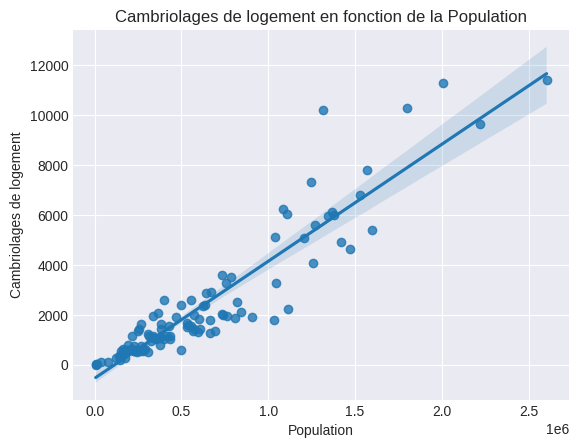

In [11]:
sns.regplot(x='Population', y='Cambriolages de logement', data=df)
plt.title('Cambriolages de logement en fonction de la Population')
plt.show()


In [12]:
df['Taux Vols avec Armes par Habitant'] = df['Vols avec armes (armes à feu, armes blanches ou par destination)'] / df['Population']
df['Taux Vols Violents sans Arme par Habitant'] = df['Vols violents sans arme'] / df['Population']
# Répétez pour d'autres types de crimes


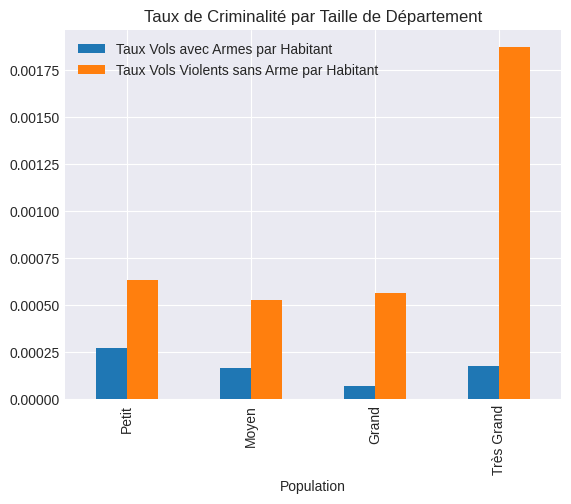

In [13]:
# Vous pouvez, par exemple, diviser les départements en quartiles basés sur la population
quartiles = pd.qcut(df['Population'], 4, labels=['Petit', 'Moyen', 'Grand', 'Très Grand'])
df.groupby(quartiles)[['Taux Vols avec Armes par Habitant', 'Taux Vols Violents sans Arme par Habitant']].mean().plot(kind='bar')
plt.title('Taux de Criminalité par Taille de Département')
plt.show()



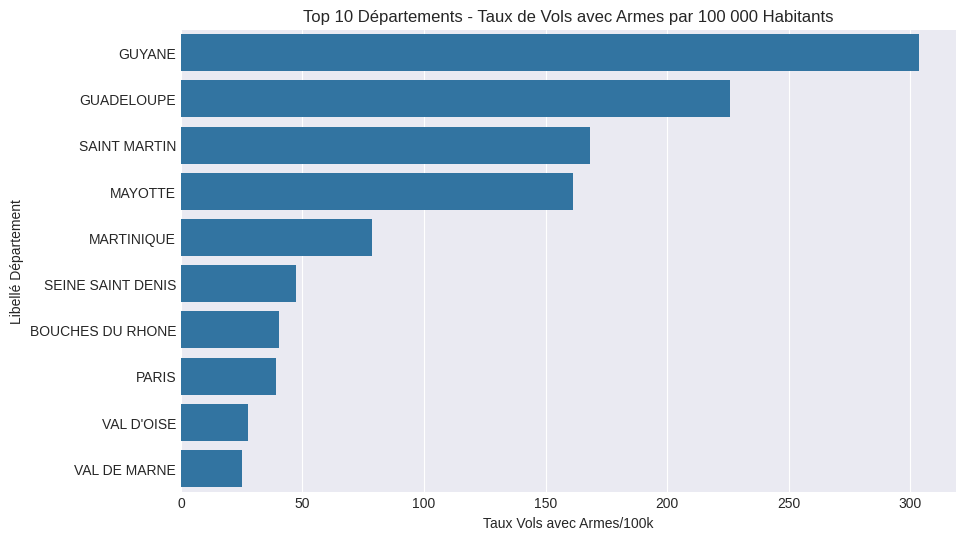

In [14]:
# Calculer les taux par 100 000 habitants
df['Taux Vols avec Armes/100k'] = df['Vols avec armes (armes à feu, armes blanches ou par destination)'] / df['Population'] * 100000

# Top 10 départements pour les vols avec armes
top_vols_avec_armes_par_100k = df.nlargest(10, 'Taux Vols avec Armes/100k')

plt.figure(figsize=(10, 6))
sns.barplot(y='Libellé Département', x='Taux Vols avec Armes/100k', data=top_vols_avec_armes_par_100k)
plt.title('Top 10 Départements - Taux de Vols avec Armes par 100 000 Habitants')
plt.show()


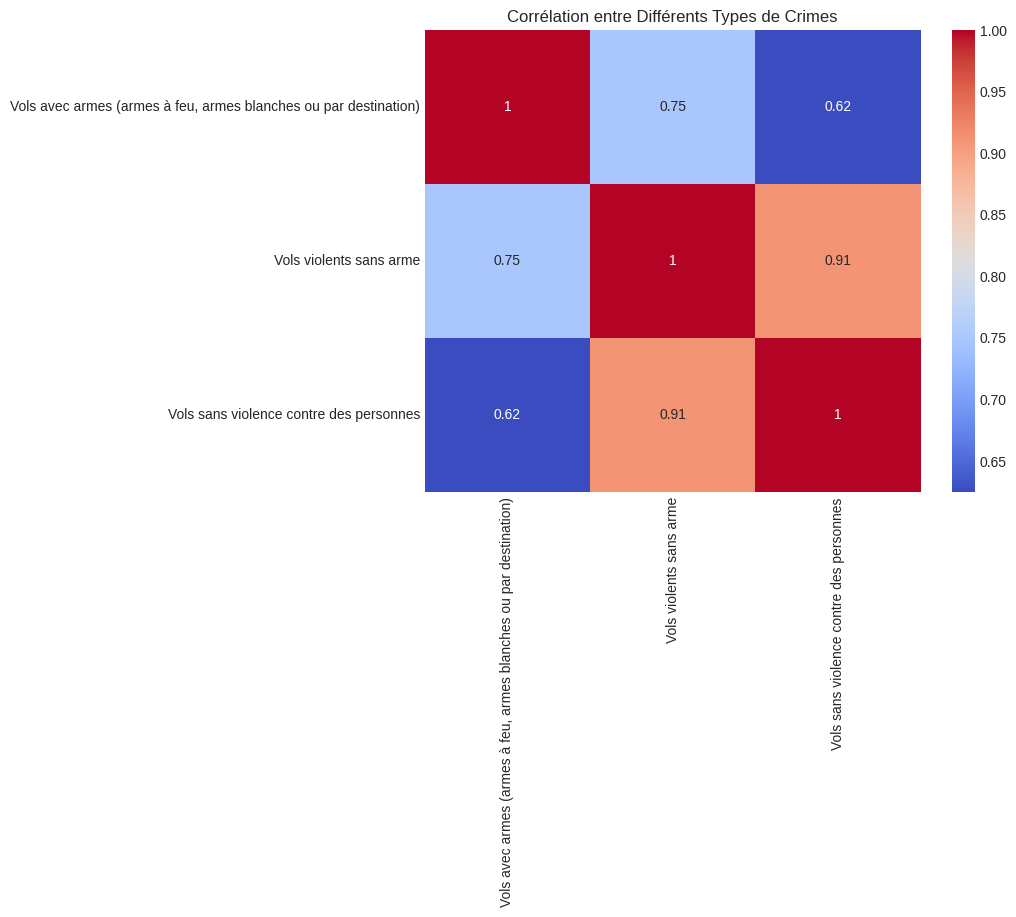

In [15]:
# Calculer la matrice de corrélation
crime_columns = ['Vols avec armes (armes à feu, armes blanches ou par destination)', 
                 'Vols violents sans arme', 
                 'Vols sans violence contre des personnes']
corr = df[crime_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corrélation entre Différents Types de Crimes')
plt.show()


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


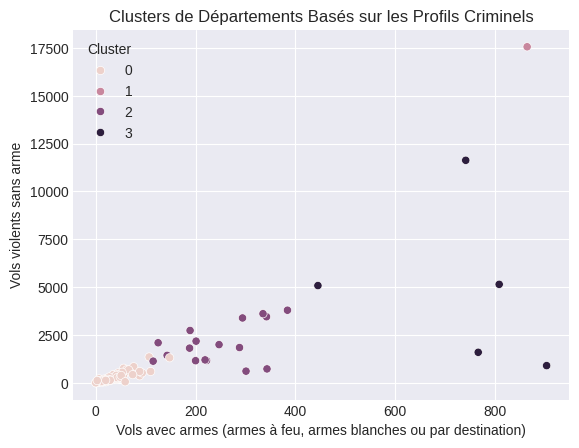

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normaliser les données
scaler = StandardScaler()
crime_data_scaled = scaler.fit_transform(df[crime_columns])

# Clustering
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(crime_data_scaled)

# Graphique
sns.scatterplot(x='Vols avec armes (armes à feu, armes blanches ou par destination)', y='Vols violents sans arme', hue='Cluster', data=df)
plt.title('Clusters de Départements Basés sur les Profils Criminels')
plt.show()


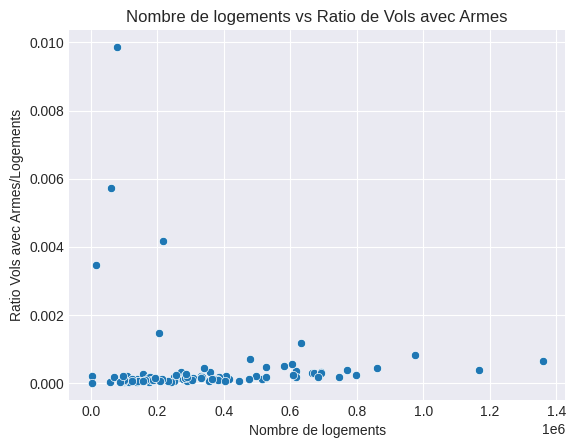

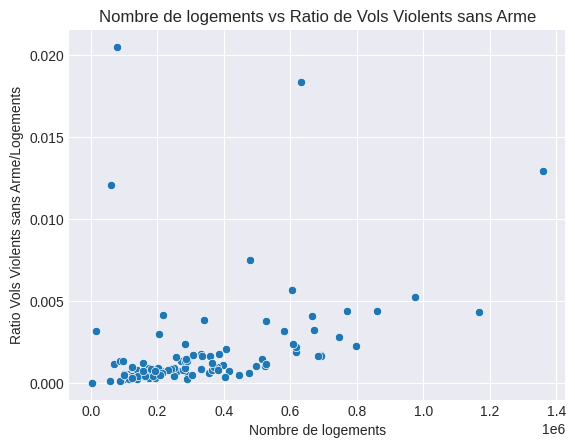

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des ratios
df['Ratio Vols avec Armes/Logements'] = df['Vols avec armes (armes à feu, armes blanches ou par destination)'] / df['Nombre de logements']
df['Ratio Vols Violents sans Arme/Logements'] = df['Vols violents sans arme'] / df['Nombre de logements']

# Scatter plot
sns.scatterplot(x='Nombre de logements', y='Ratio Vols avec Armes/Logements', data=df)
plt.title('Nombre de logements vs Ratio de Vols avec Armes')
plt.show()

sns.scatterplot(x='Nombre de logements', y='Ratio Vols Violents sans Arme/Logements', data=df)
plt.title('Nombre de logements vs Ratio de Vols Violents sans Arme')
plt.show()



/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


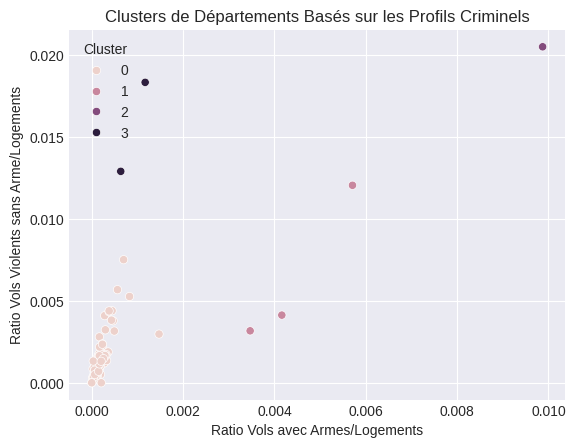

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sélection des caractéristiques pour le clustering
features = df[['Ratio Vols avec Armes/Logements', 'Ratio Vols Violents sans Arme/Logements']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Clustering
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Scatter plot pour visualiser les clusters
sns.scatterplot(x='Ratio Vols avec Armes/Logements', y='Ratio Vols Violents sans Arme/Logements', hue='Cluster', data=df)
plt.title('Clusters de Départements Basés sur les Profils Criminels')
plt.show()


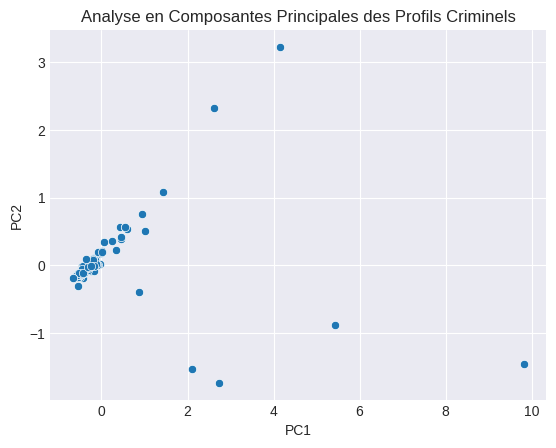

In [19]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Scatter plot des composantes principales
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Analyse en Composantes Principales des Profils Criminels')
plt.show()


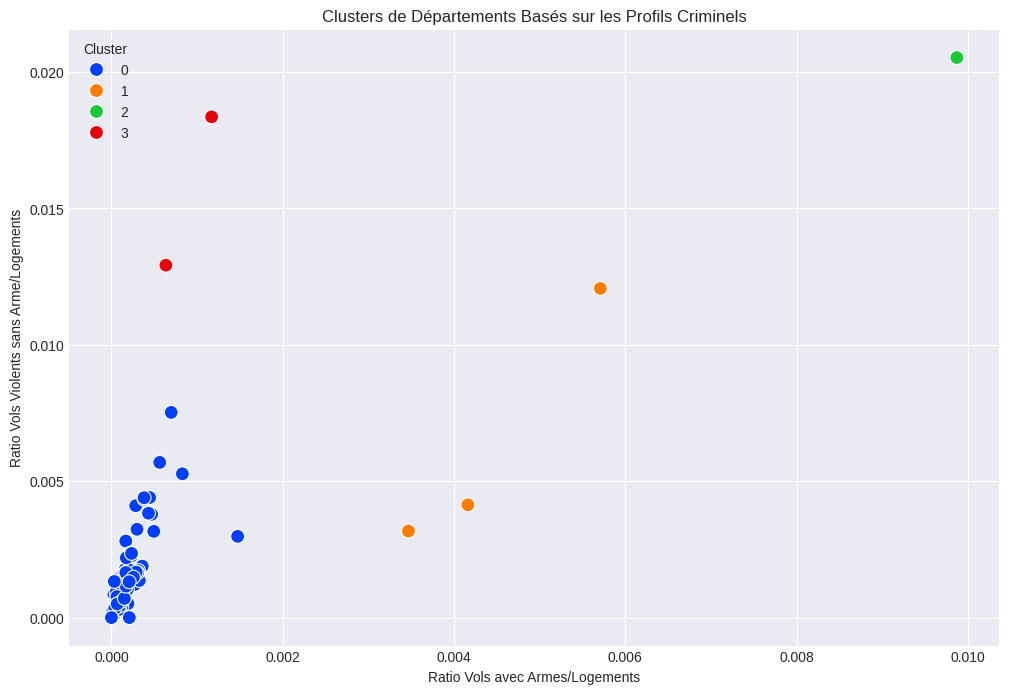

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Ratio Vols avec Armes/Logements', y='Ratio Vols Violents sans Arme/Logements', hue='Cluster', data=df, palette='bright', s=100)
plt.title('Clusters de Départements Basés sur les Profils Criminels')
plt.xlabel('Ratio Vols avec Armes/Logements')
plt.ylabel('Ratio Vols Violents sans Arme/Logements')
plt.legend(title='Cluster')
plt.show()


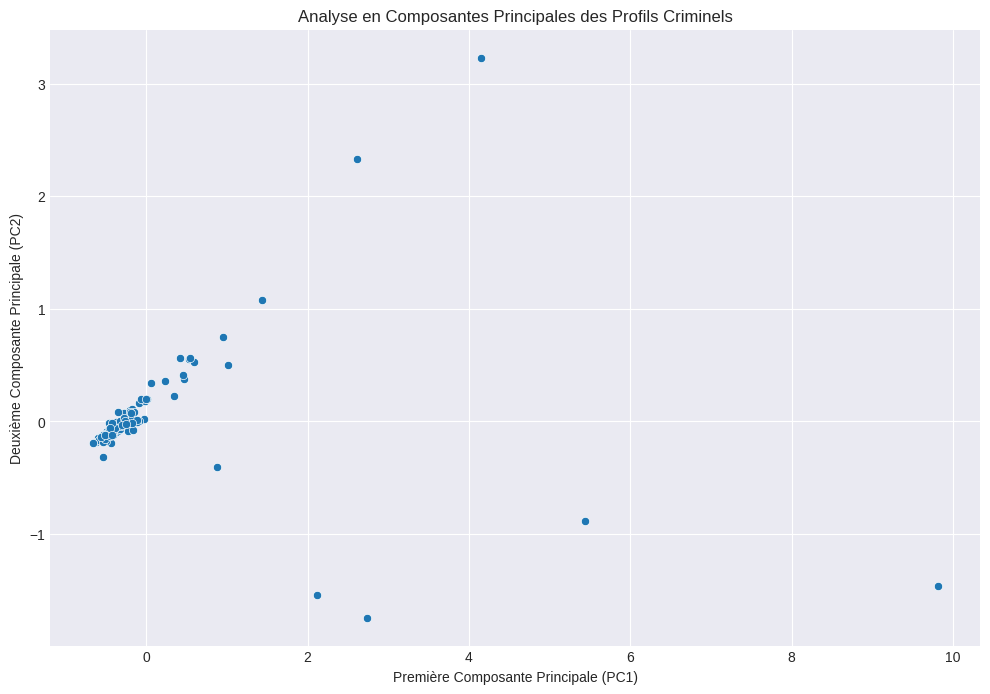

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Analyse en Composantes Principales des Profils Criminels')
plt.xlabel('Première Composante Principale (PC1)')
plt.ylabel('Deuxième Composante Principale (PC2)')
plt.show()


## Conclusion 

## Départements les plus dangereux (selon les taux de criminalité élevés) :
Bouches-du-Rhône : Ce département présente des taux élevés de vols avec armes, vols violents sans arme, cambriolages de logement, vols de véhicules, vols dans les véhicules, et vols d'accessoires sur véhicules.
Hérault : Il affiche également des taux élevés dans plusieurs catégories, y compris les vols avec armes, les vols sans violence contre des personnes, et les cambriolages de logement.
Haute-Garonne : Ce département a des taux élevés de vols violents sans arme, de coups et blessures volontaires, et de cambriolages de logement.
## Départements les plus sains (selon les taux de criminalité faibles) :
Cantal : Ce département a des taux de criminalité globalement faibles, y compris des pourcentages très bas pour les vols avec armes, les vols violents sans arme, et les coups et blessures volontaires.
Lozère : Il affiche également des taux de criminalité globalement faibles dans toutes les catégories.
Corrèze : Ce département a des taux de criminalité relativement faibles, notamment pour les vols avec armes et les vols violents sans arme.
## Évolution :
Pour évaluer l'évolution de la sécurité dans ces départements, il serait nécessaire de disposer de données historiques sur la criminalité. Malheureusement, les données fournies ici ne comportent pas d'informations historiques. L'évolution de la sécurité dépend de nombreux facteurs, notamment les politiques de sécurité locales, les initiatives de prévention de la criminalité, les facteurs économiques et sociaux, et d'autres variables. Il serait donc nécessaire de consulter des rapports officiels ou des études spécifiques pour obtenir des informations sur l'évolution de la criminalité dans chaque département.